#Imports and Data Loading

In [ ]:
#Imports
import requests
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from bs4 import BeautifulSoup
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# URL to scrape
url = 'https://database.earth/population/fertility-rate/2023'

In [ ]:
# Send an HTTP GET request to the URL and get the HTML content
response = requests.get(url)

In [ ]:
# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [ ]:
# Find the table containing the data (assuming the data is in a table)
data_table = soup.find('table')

In [ ]:
# Initialize lists to store data
ranks = []
countries = []
total_fertility_rates = []

In [ ]:
# Extract data from the table rows
for row in data_table.find_all('tr')[1:]:
    columns = row.find_all('td')
    rank = columns[0].text.strip()
    country_with_code = columns[1].text.strip()
    country = re.sub(r'🇦🇩|🇦🇪|🇦🇫|🇦🇬|🇦🇮|🇦🇱|🇦🇲|🇦🇴|🇦🇶|🇦🇷|🇦🇸|🇦🇹|🇦🇺|🇦🇼|🇦🇽|🇦🇿|🇧🇦|🇧🇧|🇧🇩|🇧🇪|🇧🇫|🇧🇬|🇧🇭|🇧🇮|🇧🇯|🇧🇱|🇧🇲|🇧🇳|🇧🇴|🇧🇶|🇧🇷|🇧🇸|🇧🇹|🇧🇻|🇧🇼|🇧🇾|🇧🇿|🇨🇦|🇨🇨|🇨🇩|🇨🇫|🇨🇬|🇨🇭|🇨🇮|🇨🇰|🇨🇱|🇨🇲|🇨🇳|🇨🇴|🇨🇵|🇨🇷|🇨🇺|🇨🇻|🇨🇼|🇨🇽|🇨🇾|🇨🇿|🇩🇪|🇩🇬|🇩🇯|🇩🇰|🇩🇲|🇩🇴|🇩🇿|🇪🇦|🇪🇨|🇪🇪|🇪🇬|🇪🇭|🇪🇷|🇪🇸|🇪🇹|🇪🇺|🇫🇮|🇫🇯|🇫🇰|🇫🇲|🇫🇴|🇫🇷|🇬🇦|🇬🇧|🇬🇩|🇬🇪|🇬🇫|🇬🇬|🇬🇭|🇬🇮|🇬🇱|🇬🇲|🇬🇳|🇬🇵|🇬🇶|🇬🇷|🇬🇸|🇬🇹|🇬🇺|🇬🇼|🇬🇾|🇬🇿|🇭🇰|🇭🇲|🇭🇳|🇭🇷|🇭🇹|🇭🇺|🇮🇨|🇮🇩|🇮🇪|🇮🇱|🇮🇲|🇮🇳|🇮🇴|🇮🇶|🇮🇷|🇮🇸|🇮🇹|🇯🇪|🇯🇲|🇯🇴|🇯🇵|🇰🇪|🇰🇬|🇰🇭|🇰🇮|🇰🇲|🇰🇳|🇰🇵|🇰🇷|🇰🇼|🇰🇾|🇰🇿|🇱🇦|🇱🇧|🇱🇨|🇱🇮|🇱🇰|🇱🇷|🇱🇸|🇱🇹|🇱🇺|🇱🇻|🇱🇾|🇲🇦|🇲🇨|🇲🇩|🇲🇪|🇲🇫|🇲🇬|🇲🇭|🇲🇰|🇲🇱|🇲🇲|🇲🇳|🇲🇴|🇲🇵|🇲🇶|🇲🇷|🇲🇸|🇲🇹|🇲🇺|🇲🇻|🇲🇼|🇲🇽|🇲🇾|🇲🇿|🇳🇦|🇳🇨|🇳🇪|🇳🇫|🇳🇬|🇳🇮|🇳🇱|🇳🇴|🇳🇵|🇳🇷|🇳🇺|🇳🇿|🇴🇲|🇵🇦|🇵🇪|🇵🇫|🇵🇬|🇵🇭|🇵🇰|🇵🇱|🇵🇲|🇵🇳|🇵🇷|🇵🇸|🇵🇹|🇵🇼|🇵🇾|🇶🇦|🇷🇪|🇷🇴|🇷🇸|🇷🇺|🇷🇼|🇸🇦|🇸🇧|🇸🇨|🇸🇩|🇸🇪|🇸🇬|🇸🇭|🇸🇮|🇸🇯|🇸🇰|🇸🇱|🇸🇲|🇸🇳|🇸🇴|🇸🇷|🇸🇸|🇸🇹|🇸🇻|🇸🇽|🇸🇾|🇸🇿|🇹🇦|🇹🇨|🇹🇩|🇹🇫|🇹🇬|🇹🇭|🇹🇯|🇹🇰|🇹🇱|🇹🇲|🇹🇳|🇹🇴|🇹🇷|🇹🇹|🇹🇻|🇹🇼|🇹🇿|🇺🇦|🇺🇬|🇺🇲|🇺🇸|🇺🇾|🇺🇿|🇻🇦|🇻🇨|🇻🇪|🇻🇬|🇻🇮|🇻🇳|🇻🇺|🇼🇫|🇼🇸|🇽🇰|🇾🇪|🇾🇹|🇿🇦|🇿🇲|🇿🇼|🇿🇼', '', country_with_code)  # Remove the country code using regular expression
    total_fertility_rate = columns[2].text.strip()

    ranks.append(rank)
    countries.append(country)
    total_fertility_rates.append(total_fertility_rate)

In [ ]:
# Create a DataFrame to store the data
data = pd.DataFrame({
    'Rank': ranks,
    'Country': countries,
    'Total Fertility Rate (births per woman)': total_fertility_rates
})

In [ ]:
# Save the data to a CSV file
data.to_csv('total_fertility_rate_2023.csv', index=False)
print("Data saved to CSV file successfully.")

Data saved to CSV file successfully.


# Data Cleaning

In [ ]:
# 1. Handling Missing Values
# Check for missing values
print(data.isnull().sum())

Rank                                       0
Country                                    0
Total Fertility Rate (births per woman)    0
dtype: int64


In [ ]:
# 2. Data Type Conversion
# Convert "Rank" column to integer
data['Rank'] = data['Rank'].astype(int)

# Convert "Total Fertility Rate (births per woman)" column to float
data['Total Fertility Rate (births per woman)'] = data['Total Fertility Rate (births per woman)'].astype(float)

In [ ]:
# 3. Removing Duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# 4. Standardizing Country Names
# Convert all country names to title case
data['Country'] = data['Country'].str.title()

In [ ]:
# 5. Outlier Detection and Treatment
upper_cap = 10  # Set an upper cap for the Total Fertility Rate
data['Total Fertility Rate (births per woman)'] = data['Total Fertility Rate (births per woman)'].clip(upper=upper_cap)

In [ ]:
# 6. Feature Scaling - Min-Max Normalization
# Normalize the "Total Fertility Rate (births per woman)" column to the range [0, 1]
scaler = MinMaxScaler()
data['Total Fertility Rate (births per woman)'] = scaler.fit_transform(data[['Total Fertility Rate (births per woman)']])

In [ ]:
# Save the cleaned data to a new CSV file
data.to_csv('cleaned_total_fertility_rate_2023.csv', index=False)
# Print the contents of the cleaned CSV file
print(data)

     Rank                           Country  \
0       1                             Niger   
1       2                              Chad   
2       3                           Somalia   
3       4  Democratic Republic Of The Congo   
4       5          Central African Republic   
..    ...                               ...   
232   233                  Saint Barthélemy   
233   234            British Virgin Islands   
234   235                          Holy See   
235   236                 Republic Of Korea   
236   237              China, Hong Kong Sar   

     Total Fertility Rate (births per woman)  
0                                   1.000000  
1                                   0.907185  
2                                   0.903421  
3                                   0.895348  
4                                   0.857921  
..                                       ...  
232                                 0.044042  
233                                 0.043550  
234         

#Modelling


In [ ]:
# Split the data into features (X) and target (y)
X = data[['Rank']]
y = data['Total Fertility Rate (births per woman)']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create and train the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [ ]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.00012500452065575043
Mean Absolute Error: 0.003911594620720053
R-squared: 0.9967729502175973


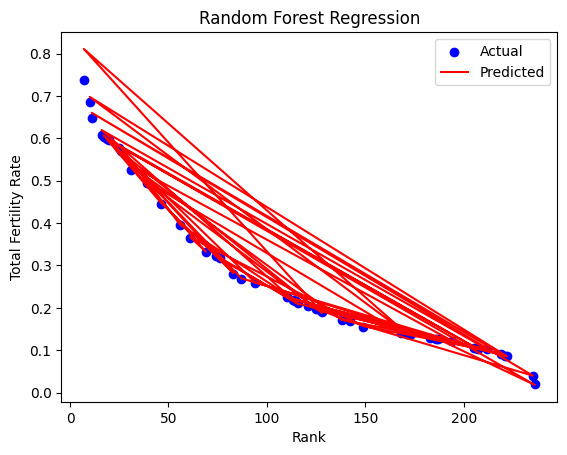

In [ ]:
# Visualization
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Rank')
plt.ylabel('Total Fertility Rate')
plt.title('Random Forest Regression')
plt.legend()
plt.show()